#### https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Download dataset from above link, you will predict salaries for Data Science Roles


Column	: Description

work_year :        The year the salary was paid.

experience_level : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type	:  The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title	The role worked in during the year.

salary	:          The total gross salary amount paid.
salary_currency	: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd	: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence	: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio	: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location	: The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size	: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

# Regression Assignment 

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
#import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import *
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Data understanding

In [4]:
df.shape

(607, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


#### Data Cleaning if required

In [6]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.nunique()/df.shape[0]*100

Unnamed: 0            100.000000
work_year               0.494234
experience_level        0.658979
employment_type         0.658979
job_title               8.237232
salary                 44.810544
salary_currency         2.800659
salary_in_usd          60.790774
employee_residence      9.390445
remote_ratio            0.494234
company_location        8.237232
company_size            0.494234
dtype: float64

In [8]:
df.drop('Unnamed: 0',inplace=True,axis=1)

# EDA 

### univarite

In [9]:
num_cols = []
cat_cols = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat_cols.append(i)
    else:
        num_cols.append(i)


In [10]:
num_cols

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

=========== work_year =============
mean :  2021.4052718286655
median :  2022.0
mode :  2022


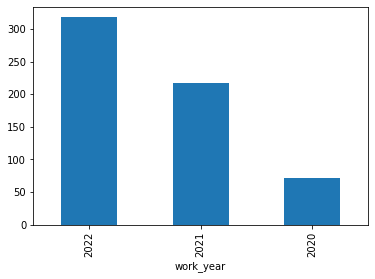

=========== salary =============
mean :  324000.0626029654
median :  115000.0
mode :  80000


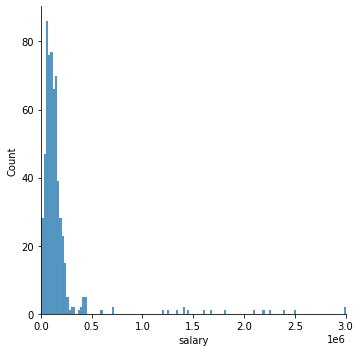

=========== salary_in_usd =============
mean :  112297.86985172982
median :  101570.0
mode :  100000


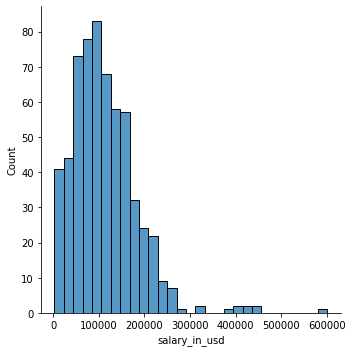

=========== remote_ratio =============
mean :  70.92257001647447
median :  100.0
mode :  100


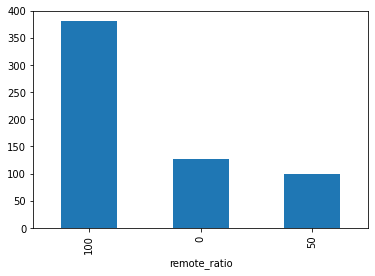

In [11]:
for i in num_cols:
    print('===========',i,'=============')
    print('mean : ',df[i].mean())
    print('median : ',df[i].median())
    print('mode : ',df[i].mode()[0])
    if df[i].value_counts().count() > 10:
        sns.displot(x=df[i])
        #plt.hist(df[i],bins=10)
        plt.xlabel(i)
        if i == 'salary':
            plt.xlim(0,3000000)
        plt.show()
    else:
        df[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        plt.show()

In [12]:
df[num_cols].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


* The dataset comprise of salaries from the year 2020 to 2022
* the salaries of average salaries ranges from 7e+04 to 1.15e+05 
* maximum employees work remotely 

In [13]:
# employee residence
least_places = list(df['employee_residence'].value_counts().tail(28).keys())
df['employee_residence'] = np.where(df['employee_residence'].isin(least_places),'other', df['employee_residence'])

# company location
loc = list(df['company_location'].value_counts().tail(21).keys())
df['company_location'] = np.where(df['company_location'].isin(loc), 'other', df['company_location'])


=========== experience_level =========
SE    46.128501
MI    35.090610
EN    14.497529
EX     4.283361
Name: experience_level, dtype: float64


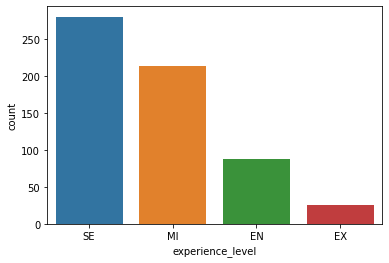

=========== employment_type =========
FT    96.869852
PT     1.647446
CT     0.823723
FL     0.658979
Name: employment_type, dtype: float64


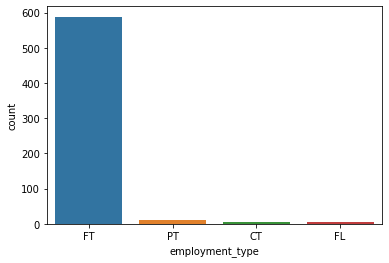

=========== job_title =========
Data Scientist                              23.558484
Data Engineer                               21.746293
Data Analyst                                15.980231
Machine Learning Engineer                    6.754530
Research Scientist                           2.635914
Data Science Manager                         1.976936
Data Architect                               1.812191
Machine Learning Scientist                   1.317957
Big Data Engineer                            1.317957
Data Analytics Manager                       1.153213
Data Science Consultant                      1.153213
Principal Data Scientist                     1.153213
Director of Data Science                     1.153213
AI Scientist                                 1.153213
Computer Vision Engineer                     0.988468
Lead Data Engineer                           0.988468
BI Data Analyst                              0.988468
ML Engineer                                  0.988

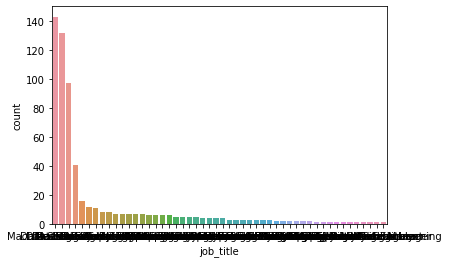

=========== salary_currency =========
USD    65.568369
EUR    15.650741
GBP     7.248764
INR     4.448105
CAD     2.965404
PLN     0.494234
JPY     0.494234
TRY     0.494234
AUD     0.329489
BRL     0.329489
MXN     0.329489
SGD     0.329489
CNY     0.329489
DKK     0.329489
HUF     0.329489
CLP     0.164745
CHF     0.164745
Name: salary_currency, dtype: float64


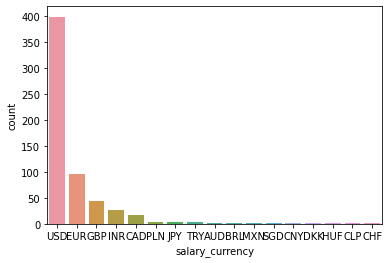

=========== employee_residence =========
US       54.695222
GB        7.248764
IN        4.942339
CA        4.777595
other     4.612850
DE        4.118616
FR        2.965404
ES        2.471170
GR        2.141680
JP        1.153213
BR        0.988468
PK        0.988468
PT        0.988468
NL        0.823723
PL        0.658979
RU        0.658979
IT        0.658979
AU        0.494234
VN        0.494234
TR        0.494234
AE        0.494234
AT        0.494234
DK        0.329489
SG        0.329489
BE        0.329489
RO        0.329489
NG        0.329489
MX        0.329489
HU        0.329489
SI        0.329489
Name: employee_residence, dtype: float64


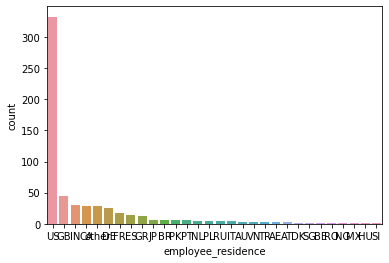

=========== company_location =========
US       58.484349
GB        7.742998
CA        4.942339
DE        4.612850
IN        3.953871
other     3.459638
FR        2.471170
ES        2.306425
GR        1.812191
JP        0.988468
PL        0.658979
AT        0.658979
NL        0.658979
PT        0.658979
DK        0.494234
AE        0.494234
MX        0.494234
AU        0.494234
BR        0.494234
TR        0.494234
LU        0.494234
PK        0.494234
CH        0.329489
SI        0.329489
NG        0.329489
RU        0.329489
CN        0.329489
BE        0.329489
IT        0.329489
CZ        0.329489
Name: company_location, dtype: float64


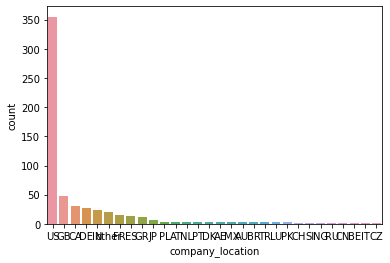

=========== company_size =========
M    53.706755
L    32.619440
S    13.673806
Name: company_size, dtype: float64


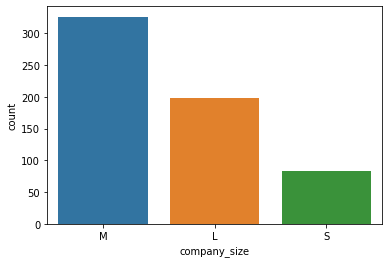

In [14]:
for i in cat_cols:
    print('===========',i,'=========')
    a = df[i].value_counts()
    print(a/df.shape[0]*100)
    sns.barplot(x=a.index,y=a)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

* There are more senior employees and the number of new entries are quite less whwn compared to senior level employes

In [15]:
df.drop(['employment_type','salary_currency','salary'],inplace=True,axis=1)

### bivarite

In [16]:
#numerical - numerical bivariate analysis

In [17]:
df.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


<AxesSubplot:>

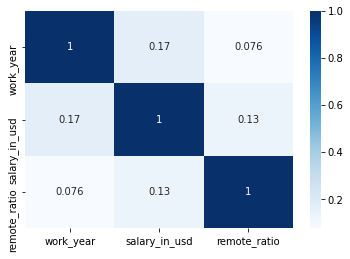

In [18]:
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues)

In [19]:
# categorical - categorical bivariate analysis

In [20]:
df.groupby(['experience_level','company_size'])[['job_title']].count().sort_values(by='job_title',ascending=False)

job_title
experience_level company_size           
SE               M                   186
MI               M                    98
                 L                    86
SE               L                    72
EN               M                    30
                 L                    29
                 S                    29
MI               S                    29
SE               S                    22
EX               M                    12
                 L                    11
                 S                     3

* There are equal number of job roles for freshers in all kinds of companies i.e large , small and medium companies
* There are more job vacancies in a medium level company for an experienced employees that to intermediate senior  level employees

In [21]:
# numerical - categorical

In [22]:
df.groupby(['experience_level','remote_ratio'])[['salary_in_usd']].mean()

salary_in_usd
experience_level remote_ratio               
EN               0              57666.357143
                 50             60099.280000
                 100            63567.367347
EX               0             158948.666667
                 50            143175.400000
                 100           221748.333333
MI               0              82129.696429
                 50             76460.642857
                 100            95065.652174
SE               0             141177.759259
                 50             95250.888889
                 100           143806.376884

* Generally a highest level excecutive employee will have the highest salary with highest work remote ratio

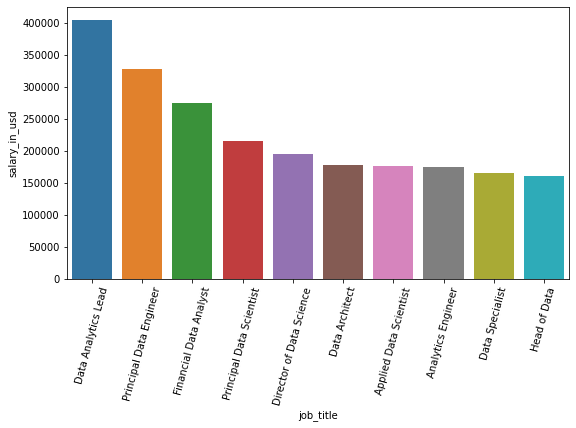

In [23]:
top_roles = pd.Series(df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10])
plt.figure(figsize=(9,5))
plt.xticks(rotation=75)
sns.barplot(x=top_roles.index,y=top_roles)
plt.show()

* These are the top roles which brings greater salaries

Wall time: 683 ms


<Figure size 1800x1200 with 0 Axes>

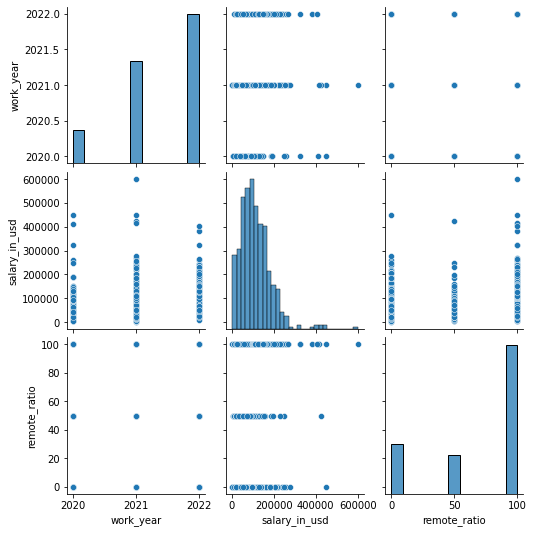

In [24]:
%%time
plt.figure(dpi=300)
sns.pairplot(df)

In [25]:
data = df.copy()


In [26]:
encoder = LabelEncoder()
for i in ['job_title','employee_residence','company_location','company_size','experience_level']:
    data[i] = encoder.fit_transform(data[i])

In [27]:
#derived metrics

In [28]:
#visulization (if any extra)

# Feature Engineering

In [29]:
# Feature engineering

In [30]:
#data.drop(['company_location','work_year','salary','salary_currency','employment_type','company_location','employee_residence'],inplace=True,axis=1)

In [31]:
inputs = data[['work_year', 'experience_level','job_title', 'employee_residence','company_location','remote_ratio']]
target = data[['salary_in_usd']]

In [32]:
inputs = data.drop('salary_in_usd',axis=1).values
target = data[['salary_in_usd']].values

for i in range(inputs.shape[1]):
    print(data.columns[i],' == ',variance_inflation_factor(inputs,i))

work_year  ==  19.32700771805468
experience_level  ==  5.545868724181394
job_title  ==  5.126178451070937
salary_in_usd  ==  26.885229177555416
employee_residence  ==  4.170379530362058
remote_ratio  ==  32.69386109014749
company_location  ==  2.5612999425251215


In [33]:
#Data splitting

x_train,x_test,y_train,y_test = train_test_split(inputs,target)

# Model building

In [34]:
from sklearn.metrics import *
metrics_df = pd.DataFrame()
def score(y_test,pred,model):
    dict = {
        'model':model,
        'MAE':mean_absolute_error(y_test,pred),
        'MSE':mean_squared_error(y_test,pred),
        'RMSE':np.sqrt(mean_squared_error(y_test,pred)),
        'Explained variance score':explained_variance_score(y_test,pred),
        'R2 score':r2_score(y_test,pred)
    }
    return dict

In [35]:
lin_reg = LinearRegression(fit_intercept=True, normalize=False)
lin_reg.fit(x_train,y_train)

l_pred = lin_reg.predict(x_test)
metrics_df = metrics_df.append(score(y_test,l_pred,'Linear Regression'),ignore_index=True)

In [36]:
ridge_reg = Ridge(alpha=0.1, fit_intercept=True, normalize=True, solver='lsqr')
ridge_reg.fit(x_train,y_train)

r_pred = ridge_reg.predict(x_test)
metrics_df = metrics_df.append(score(y_test,r_pred,'Ridge Regression'),ignore_index=True)

In [37]:
lasso_reg = Lasso(alpha=10, fit_intercept=True, normalize=True)
lasso_reg.fit(x_train,y_train)

la_pred = lasso_reg.predict(x_test)
metrics_df = metrics_df.append(score(y_test,la_pred,'Lasso Regression'),ignore_index=True)

# Metrics

In [38]:
#create a Data Frame showing metrics of above models

In [39]:
metrics_df.set_index('model')

,Explained variance score,MAE,MSE,R2 score,RMSE
model,,,,,
Linear Regression,0.166484,45671.848937,4.691271e+09,0.164503,68492.854915
Ridge Regression,0.166484,45671.848937,4.691271e+09,0.164503,68492.854915
Lasso Regression,0.166484,45671.848937,4.691271e+09,0.164503,68492.854915


In [40]:
# explain which model does it better 

* Linear regression gives good score

# GridSearch CV

In [41]:
# implement grid search for the best model, recommend best hyperparameters

In [42]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [43]:
# cross validation for multiple experiments
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [44]:
model_params = {
    'linear':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept':[True, False],
            'normalize':[True, False]
        }
    },
    'ridge':{
        'model':Ridge(),
        'params':{
            'solver':['svd', 'cholesky', 'lsqr', 'sag'],
            'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
            'fit_intercept':[True, False],
            'normalize':[True, False]
        }
    },
    'lasso' : {
        'model':Lasso(),
        'params':{
           'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
            'fit_intercept':[True, False],
            'normalize':[True, False] 
        }
    }
}

In [45]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [46]:
scores_df = pd.DataFrame(scores)
pd.set_option('max_colwidth', 1000)
scores_df

,model,best_score,best_params
0,linear,-40560.706646,"{'fit_intercept': False, 'normalize': True}"
1,ridge,-40545.820325,"{'alpha': 10, 'fit_intercept': False, 'normalize': True, 'solver': 'cholesky'}"
2,lasso,-40557.950729,"{'alpha': 100, 'fit_intercept': False, 'normalize': True}"
